<span style="color:DarkBlue;font-size:32px">Preisvorhersage von Gebrauchtwagen </span>

<span style="color:DarkBlue;font-size:18px">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning (SS2023)</span>

<span style="color:DarkBlue;font-size:18px"> Bearbeitet von M.Sc. Onur Yilmaz</span>

### **Inhaltsverzeichnis**

[Einleitung](#Einleitung)

[1. Datenaufbereitung](#Datenaufbereitung)

[1.1. Daten extrahieren](#Daten-extrahieren)

[1.2. Daten bereinigen](#Daten-bereinigen)

[1.3. Daten transformieren](#Daten-transformieren)

[2. Explorative Datenanalyse](#Explorative-Datenanalyse)

[2.1. Univariate Analyse](#Univariate-Analyse)

[2.2. Bivariate Analyse](#Bivariate-Analyse)

[2.3. Multivariate Analyse](#Multivariate-Analyse)

[3. Feature Engineering](#Feature-Engineering)

[4. Modell Auswahl und Training ](#Modell-Auswahl-und-Training)

[5. Modell Bewertung](#Modell-Bewertung)

[6. Streamlit](#Streamlit)

[Literaturverzeichnis](#Literaturverzeichnis)


### <a id="Einleitung"></a>**Einleitung**

In der vorliegenden semesterabschließenden Arbeit wird ein aufbereiteter Datensatz von 100.000 gebrauchten Autoanzeigen aus dem Vereinigten Königreich analysiert. Der Datensatz wurde von der Plattform Kaggle bezogen - **https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes**.

Das Hauptziel dieser Arbeit ist die Wahl und Implementierung eines geeigneten maschinellen Lernmodells zur Preisvorhersage von Gebrauchtwagen.

Die Arbeit gliedert sich in verschiedene Abschnitte, beginnend mit der Datenaufbereitung, gefolgt von der explorativen Datenanalyse und dem Feature Engineering. Anschließend wird das passende Modell ausgewählt und trainiert, bevor es bewertet wird. Zusätzlich wird die Implementierung in Streamlit durchgeführt, um eine interaktive Webanwendung zur Darstellung der Ergebnisse zu erstellen.

Der Datensatz ist in einzelne Dateien nach Autoherstellern unterteilt und enthält Informationen wie Preis, Getriebe, Kilometerstand, Kraftstoffart, Kfz-Steuer, Verbrauch in Meilen pro Gallone (mpg) und Motorgröße.

**Das gesamte Projekt kann aus dem folgenden Repository geklont werden: https://www.github.com/ONURYI**

### <a id="Datenaufbereitung"></a>**1. Datenaufbereitung**

#### <a id="Daten-extrahieren"></a>**1.1. Daten extrahieren**

Die Datenaufbereitung stellt im Prozess des maschinellen Lernens oft einen entscheidenden, aber zugleich zeitaufwendigen Schritt dar. Sie umfasst diverse Techniken zur Säuberung, Transformation und Organisation der Rohdaten, um sie in ein für die Analyse passendes Format zu überführen. Diese Etappe legt das solide Fundament für die Erstellung eines Modells, da sie die Qualität und Relevanz der Daten gewährleistet. Dies trägt maßgeblich zur Präzision und Leistungsfähigkeit des endgültigen Modells bei [2].

Im Kontext unseres Projektes verwenden wir folgende CSV-Dateien (CSV = Comma-Separated Values):

- audi.csv
- bmw.csv
- ford.csv
- hyundai.csv
- mercedes.csv
- skoda.csv
- toyota.csv
- vauxhall.csv (unbenannt in opel)
- vw.csv

Diese Dateien sind im Ordner **/data** gespeichert und werden nach dem Aufbereitungs- und Bereinigungsprozess im Ordner **/data (clean)** als einzige zusammengefasste CSV-Datei abgelegt.

Für diesen Abschnitt wird ausschließlich auf die weit verbreitete **Pandas-Bibliothek** zurückgegriffen, welche sich als leistungsfähiges Werkzeug zur Datenmanipulation und -analyse etabliert hat. Hierbei lesen wir die Daten aus und stellen die Daten als sog. **DataFrames** dar, da sie eine standardisierte, zweidimensionale Struktur bieten, die das Speichern, Manipulieren und Analysieren von tabellarischen Daten vereinfacht, wodurch die Datenanalyse und -verarbeitung insgesamt effizienter und übersichtlicher wird [3].

In [1]:
import pandas as pd

Wir lesen nun die ersten CSV-Files aus, uns erst einmal einen Überblick zu verschaffen:

In [2]:
df_audi =  pd.read_csv('../data/audi.csv')
df_ford  =  pd.read_csv('../data/ford.csv')

In [3]:
df_audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
df_ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Der Befehl *df.shape* gibt uns Auskunft über die zugehörige Dimension unseres DataFrames. Die erste Zahl, gibt die Anzahl der Zeilen und die zweite Zahl, die Anzahl der Spalten (auch Variable oder Merkmale genannt) wieder.

In [5]:
print(df_audi.shape)
print(df_ford.shape)

(10668, 9)
(17965, 9)


Um schließlich einen umfassenden Datensatz zu erhalten, fassen wir diesen in einem DataFrame zusammen, wobei wir eine zusätzliche Spalte hinzugefügt haben, die als brand bezeichnet wird und die Marke des Modells enthält.

In [6]:
file_paths = [
    '../data/audi.csv',
    '../data/bmw.csv',
    '../data/ford.csv',
    '../data/hyundai.csv',
    '../data/mercedes.csv',
    '../data/skoda.csv',
    '../data/toyota.csv',
    '../data/opel.csv',
    '../data/vw.csv',
]

all_dataframes = []

# Durchlaufe alle Dateipfade und lade die CSV-Dateien
for file_path in file_paths:
    df = pd.read_csv(file_path)
    brand = file_path.split('/')[-1].split('.')[0]  # Extrahiere die Marke aus dem Dateinamen
    df['brand'] = brand  # Füge eine Spalte mit der Marke hinzu
    # Ändere die Reihenfolge der Spalten, um "brand" an den Anfang zu setzen
    df = df[['brand'] + [col for col in df.columns if col != 'brand']]
    all_dataframes.append(df)

df = pd.concat(all_dataframes, ignore_index=True)

In [7]:
df.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN


In [8]:
df.shape

(99187, 11)

#### <a id="Daten-bereinigen"></a>**1.2. Daten bereinigen**

Um redundate Daten vorzubeugen müssen wir vorab unsere Daten auf Duplikate prüfen:

In [9]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

df = df.drop_duplicates()

df.shape

1475


(97712, 11)

Insgesamt hat sich der Datensatz somit um 1457 Zeilen reduziert. 

Als nächsten Schritt prüfen wir den Datensatz anschließend auf fehlende Werte:

In [10]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

tax        4774
tax(£)    92938
dtype: int64

Es gibt fehlende Werte in den Spalten tax, mpg, und tax(£). 

Gerade die Spalte tax(£) scheint in einem großen Teil des Datensatzes zu fehlen, weshalb wir die Spalte entfernen können, aufgrund fehlendem Informationsgehalt.


Die anderen Spalten könnten wir die fehlenden Werte mit geeigneten Methoden behandeln, wie z.B. durch das Ausfüllen mit dem Durchschnittswert oder Median.

In [11]:
df = df.drop(columns=['tax(£)'])
df['tax'].fillna(df['tax'].median(), inplace=True)
df['mpg'].fillna(df['mpg'].median(), inplace=True)

In [12]:
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Nun nachdem wir geprüft haben, dass auch die Daten keine fehlenden Werte (**missing values**) mehr enthalten, müssen wir nun schauen das unsere Daten insgesamt plausibel sind.

In [13]:
print(df['year'].min())
print(df['year'].max())

1970
2060


Diese problematischen Zeilen müssen wir nun einmal filtern.

In [14]:
df = df[(df['year'] != 1970) & (df['year'] != 2060)]

In [15]:
df.shape

(97709, 10)

In [16]:
unique_values_counts = df['transmission'].value_counts()

print("Einzelne eindeutige Werte und ihre Häufigkeit:")
print(unique_values_counts)

Einzelne eindeutige Werte und ihre Häufigkeit:
Manual       55501
Semi-Auto    22296
Automatic    19903
Other            9
Name: transmission, dtype: int64


In [17]:
unique_values_counts = df['fuelType'].value_counts()

print("Einzelne eindeutige Werte und ihre Häufigkeit:")
print(unique_values_counts)

Einzelne eindeutige Werte und ihre Häufigkeit:
Petrol      53980
Diesel      40418
Hybrid       3059
Other         246
Electric        6
Name: fuelType, dtype: int64


#### <a id="Daten-transformieren"></a>**1.3. Daten transformieren**

Da es sich bei dem vorliegenden Datensatz um einen UK-Datensatz handelt, waren die Spalten und Zeilen ursprünglich für den englischsprachigen Raum konzipiert. Um jedoch eine bessere Interpretierbarkeit unserer Daten im deutschsprachigen Kontext zu gewährleisten, haben wir die Daten entsprechend transformiert. 

**Es ist wichtig zu betonen, dass die Konvertierung von Einheiten und die Abweichung von den Rohdaten problematisch sein können!**

Hierbei wurde [4] hinzugezogen um noch einmal auf die Richtigkeit der Funktionen zu überprüfen und nachzujustieren.

In [18]:
# Funktion Umrechnung von (mpg) zu (l/100km)
def mpg_to_l_per_100km(mpg):
    return 235.215 / mpg

# Funktion Umrechnung Meilen zu km
def miles_to_km(miles):
    return miles * 1.60934

In [19]:
df.columns = [
    'Marke', 'Modell', 'Baujahr', 'Preis (£)', 'Getriebe', 'Kilometerstand', 'Kraftstoffart', 'Steuer (£)', 'Verbrauch (l/100km)', 'Motorgröße (l)']

df['Getriebe'] = df['Getriebe'].map({'Manual': 'Manuell', 
                                     'Automatic': 'Automatik', 
                                     'Semi-Auto': 'Halbautomatisch',
                                     'Other': 'Andere'})

df['Kraftstoffart'] = df['Kraftstoffart'].map({'Petrol': 'Benzin', 
                                               'Diesel': 'Diesel', 
                                               'Hybrid': 'Hybrid',
                                               'Other': 'Andere',
                                               'Electric': 'Elektrisch'})

df['Kilometerstand'] = df['Kilometerstand'].apply(miles_to_km).astype(int)

df['Verbrauch (l/100km)'] = df['Verbrauch (l/100km)'].apply(mpg_to_l_per_100km).round(2)

df['Marke'] = df['Marke'].str.capitalize()

In [20]:
# Wechselkurs von Pfund zu Euro festlegen
exchange_rate = 1.15

# Umrechnung der Preise und Steuern von Pfund in Euro
df['Preis (€)'] = df['Preis (£)'] * exchange_rate
df['Steuer (€)'] = df['Steuer (£)'] * exchange_rate

df['Preis (€)']


# Entfernen der alten Spalten in Pfund
df.drop(columns=['Preis (£)', 'Steuer (£)'], inplace=True)

In [21]:
string_columns = ['Marke', 'Modell', 'Getriebe', 'Kraftstoffart']

df[string_columns] = df[string_columns].apply(lambda x: x.str.replace(" ", ""))

In [22]:
# Entfernen der unerwünschten Ausprägungen in 'Getriebe' und 'Kraftstoffart' (da wenige Zeilen - wenig Aussagekraft)
df = df[(df['Getriebe'] != 'Andere') & 
                 (df['Kraftstoffart'] != 'Elektrisch') & 
                 (df['Kraftstoffart'] != 'Andere')]


In [23]:
df

,Marke,Modell,Baujahr,Getriebe,Kilometerstand,Kraftstoffart,Verbrauch (l/100km),Motorgröße (l),Preis (€),Steuer (€)
0,Audi,A1,2017,Manuell,25322,Benzin,4.25,1.4,14375.00,172.50
1,Audi,A6,2016,Automatik,58262,Diesel,3.66,2.0,18975.00,23.00
2,Audi,A1,2016,Manuell,48193,Benzin,4.25,1.4,12650.00,34.50
3,Audi,A4,2017,Automatik,41765,Diesel,3.50,2.0,19320.00,166.75
4,Audi,A3,2019,Manuell,3215,Benzin,4.74,1.0,19895.00,166.75
...,...,...,...,...,...,...,...,...,...,...
99182,Vw,Eos,2012,Manuell,119091,Diesel,3.99,2.0,6888.50,143.75
99183,Vw,Fox,2008,Manuell,141786,Benzin,5.08,1.2,2068.85,166.75
99184,Vw,Fox,2009,Manuell,112653,Benzin,5.60,1.4,1828.50,230.00
99185,Vw,Fox,2006,Manuell,133098,Benzin,5.08,1.2,1437.50,172.50


Speichern unseres bereinigten Datensatzes in der Ordner **\data (clean)**:

In [24]:
df.to_csv('../data (clean)/df_clean.csv', index=False)

### <a id="Explorative-Datenanalyse"></a>**2. Explorative Datenanalyse**


Der folgende Abschnitt stützt sich auf Konzepte und Methoden aus [5].

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df.dtypes

Marke                   object
Modell                  object
Baujahr                  int64
Getriebe                object
Kilometerstand           int64
Kraftstoffart           object
Verbrauch (l/100km)    float64
Motorgröße (l)         float64
Preis (€)              float64
Steuer (€)             float64
dtype: object

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Baujahr,97449.0,2017.066609,2.108785,1996.0,2016.00,2017.00,2019.00,2020.00
Kilometerstand,97449.0,37375.932590,33902.358051,1.0,12364.00,28469.00,52303.00,519816.00
Verbrauch (l/100km),97449.0,4.545683,3.368024,0.5,3.75,4.33,4.99,784.05
Motorgröße (l),97449.0,1.665374,0.558592,0.0,1.20,1.60,2.00,6.60
Preis (€),97449.0,19287.710288,11354.239945,517.5,11498.85,16617.50,23862.50,183998.85
Steuer (€),97449.0,139.555260,71.579592,0.0,143.75,166.75,166.75,667.00


#### <a id="Daten-bereinigen"></a>**2.1. Univariate Analyse**

In der univariaten Analyse werden wir die Verteilung jedes Merkmals einzeln betrachten um uns einen Überblick über die Daten zu verschaffen. 

Hierfür werden wir sowohl numerische als auch kategoriale Merkmale analysieren.

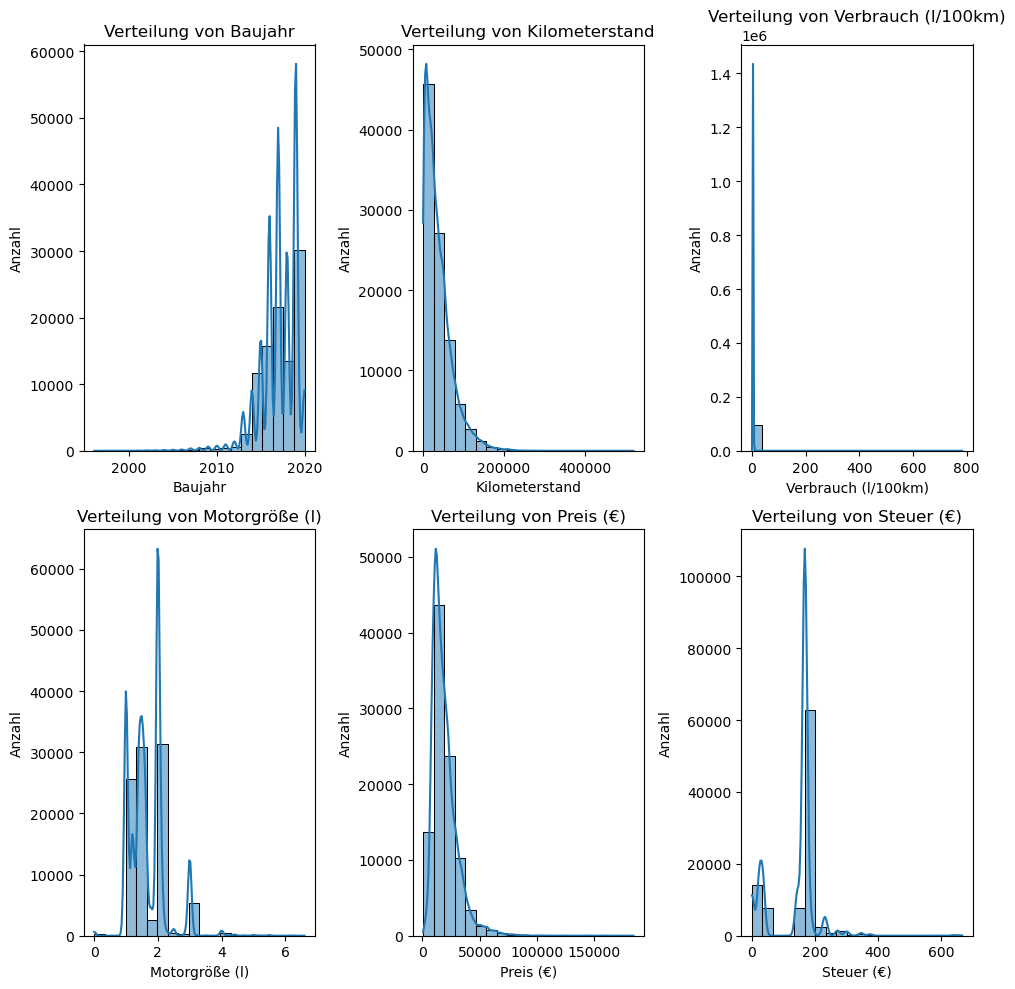

In [28]:
plt.figure(figsize=(10, 10))

numerical_columns = ['Baujahr', 'Kilometerstand', 'Verbrauch (l/100km)', 'Motorgröße (l)', 'Preis (€)', 'Steuer (€)']

# Erstellen von Subplots für jede numerische Variable
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Verteilung von {col}')
    plt.xlabel(col)
    plt.ylabel('Anzahl')

plt.tight_layout()
plt.show()

Die Histogramme zeigen die Verteilung der einzelnen numerischen Merkmale:

- Baujahr: Die meisten Autos wurden zwischen 2016 und 2020 gebaut.

- Kilometerstand: Die Verteilung ist rechtsschief, wobei die meisten Autos einen niedrigen Kilometerstand haben.

- Verbrauch (l/100km): Die meisten Autos haben einen Verbrauch zwischen 3 und 6 Litern pro 100 Kilometer. 

- Motorgröße (l): Die meisten Autos haben eine Motorgröße zwischen 1 und 2 Litern.

- Preis (€): Die Verteilung des Preises ist rechtsschief, wobei die meisten Autos im niedrigeren Preissegment liegen.

- Steuer (€): Die Steuern variieren, wobei die meisten Autos Steuern im Bereich von 100 bis 200 € haben.

Nun betrachten wir noch die Verteilungen der kategorischen Merkmale: "Marke", "Getriebe" und "Kraftstoffart". 

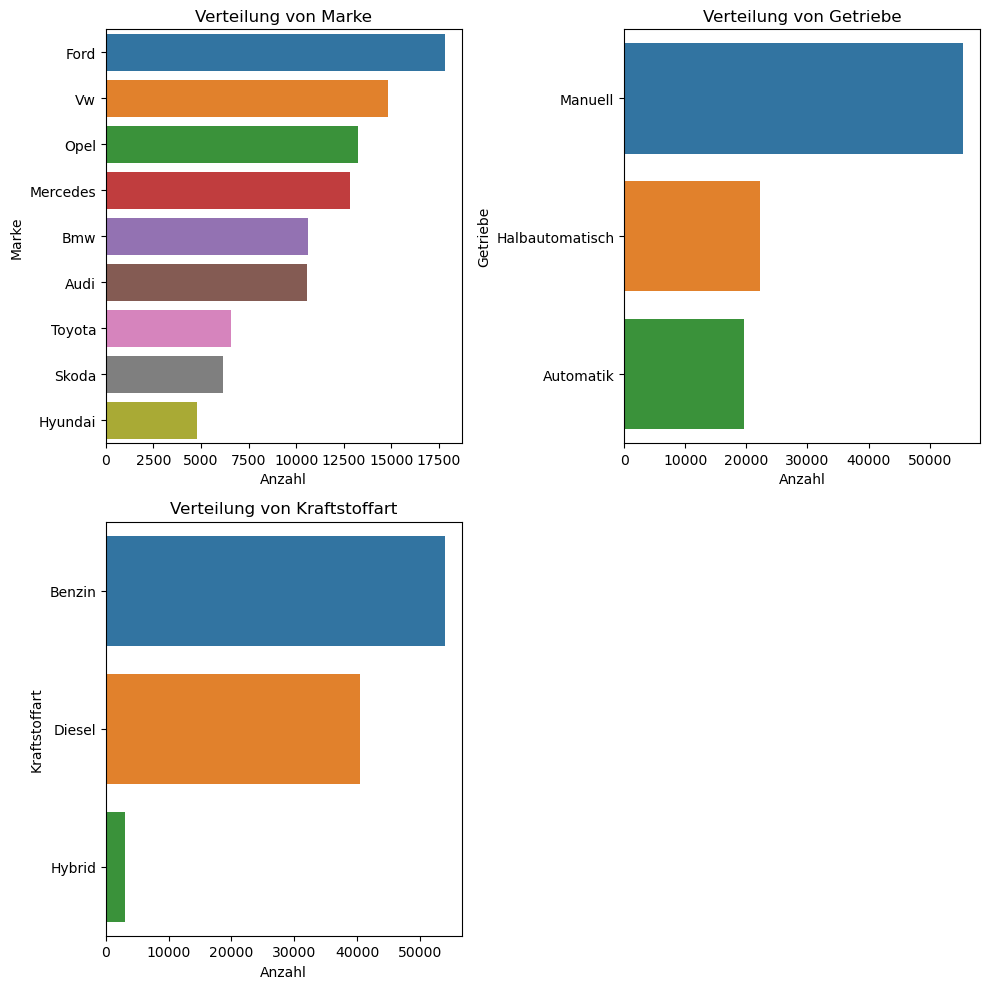

In [29]:
plt.figure(figsize=(10, 10))

categorical_columns = ['Marke', 'Getriebe', 'Kraftstoffart']

# Erstellen von Subplots für jede kategorische Variable
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Verteilung von {col}')
    plt.xlabel('Anzahl')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Da die Variable Modell zu viele Ausprägungen besitzt beschränken wir uns auf die Top-3-Modelle für jede der Top-5-Marken in den Daten. 

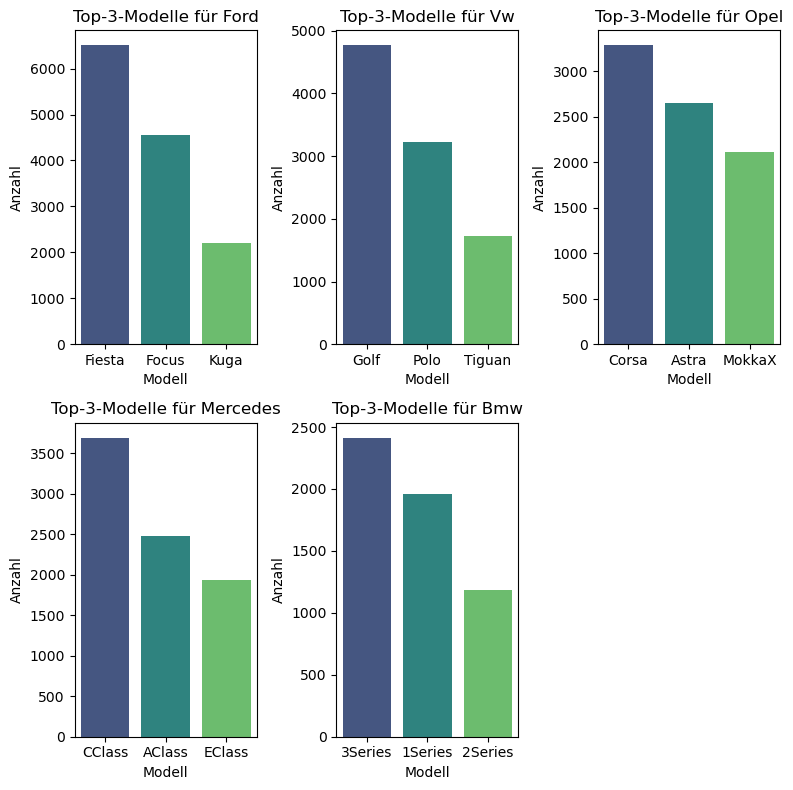

In [30]:
top_5_brands = df['Marke'].value_counts().nlargest(5).index.tolist()

plt.figure(figsize=(8, 8))
for i, brand in enumerate(top_5_brands, 1):
    top_3_models = df[df['Marke'] == brand]['Modell'].value_counts().nlargest(3)
    plt.subplot(2, 3, i)
    sns.barplot(x=top_3_models.index, y=top_3_models.values, palette='viridis')
    plt.title(f'Top-3-Modelle für {brand}')
    plt.xlabel('Modell')
    plt.ylabel('Anzahl')

plt.tight_layout()
plt.show()

#### <a id="Daten-bereinigen"></a>**2.2. Bivariate Analyse**

Die Korrelationsanalyse ist eine spezifische Form der bivariaten Analyse, bei der wie die lineare Beziehung zwischen zwei Merkmalen mit Hilfe des sog. *Pearson-Korrelationskoeffizient* messen.

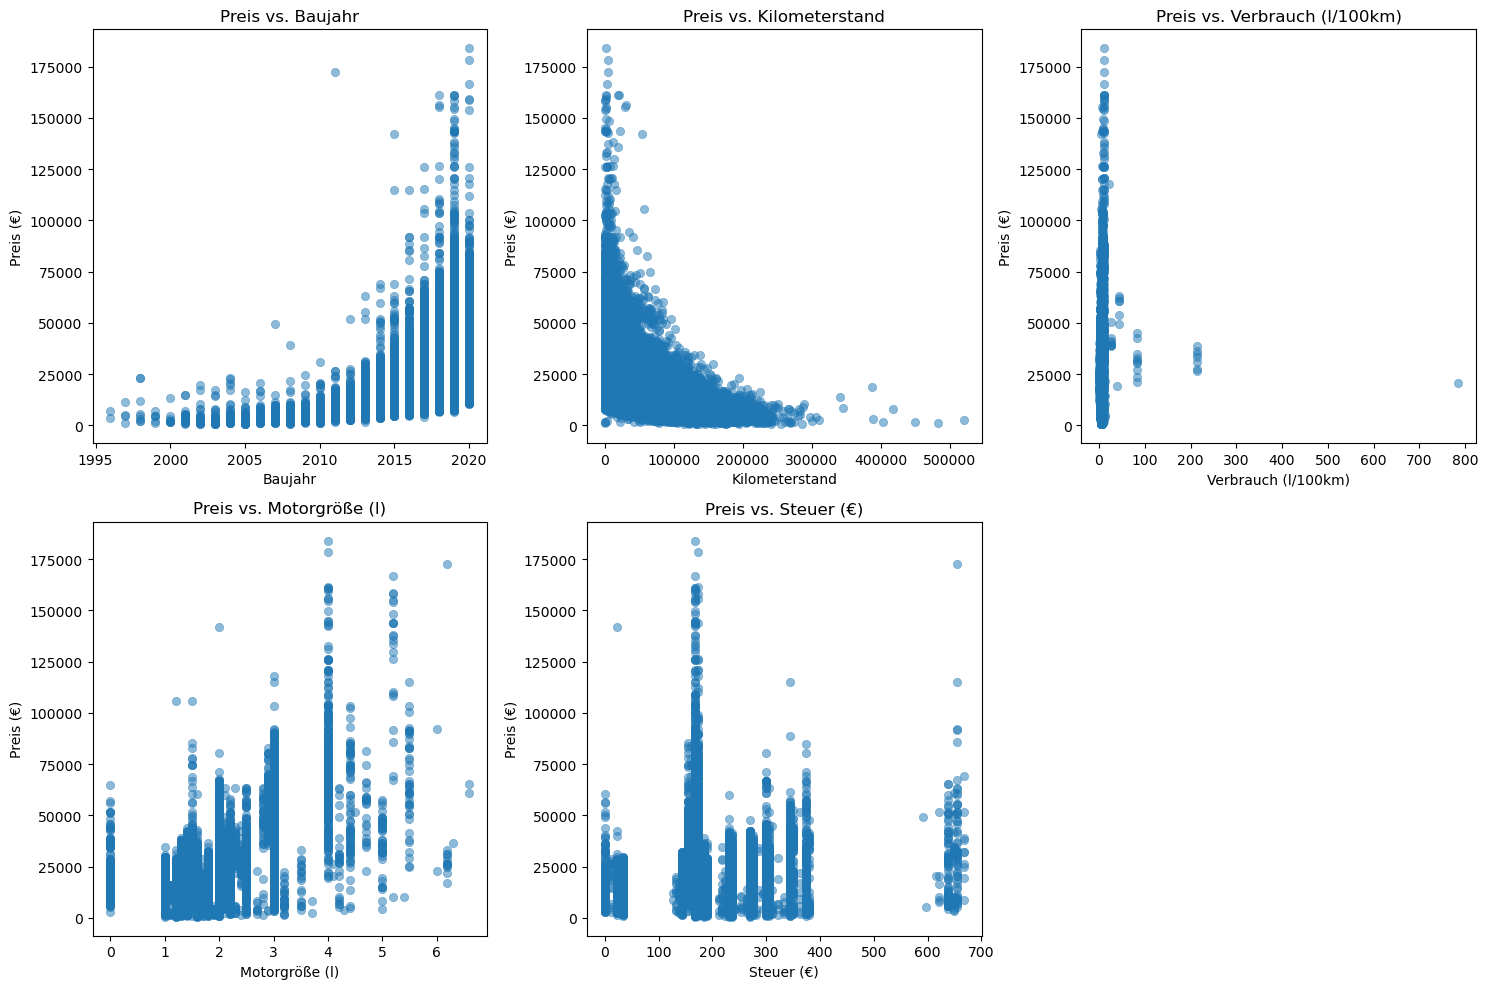

In [31]:
# Erstellen von Scatterplots für Preis gegen andere numerische Merkmale
numerical_columns.remove('Preis (€)')

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['Preis (€)'], alpha=0.5, edgecolor=None)
    plt.title(f'Preis vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Preis (€)')

plt.tight_layout()
plt.show()


- Preis vs. Baujahr: Es scheint einen positiven Zusammenhang zwischen dem Baujahr und dem Preis zu geben. Neuere Autos tendieren dazu, teurer zu sein.

- Preis vs. Kilometerstand: Es gibt einen negativen Zusammenhang zwischen Kilometerstand und Preis. Autos mit höherem Kilometerstand sind tendenziell günstiger.

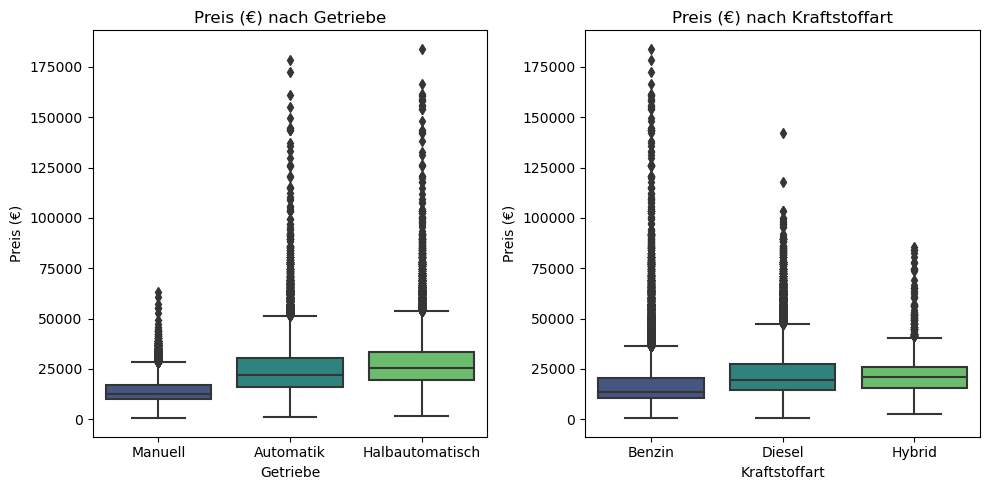

In [32]:
categorical_pairings = [('Preis (€)', 'Getriebe'), ('Preis (€)', 'Kraftstoffart')]

plt.figure(figsize=(10, 5))
for i, (y, x) in enumerate(categorical_pairings, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[x], y=df[y], palette='viridis')
    plt.title(f'{y} nach {x}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()


- Preis vs. Getriebe: Autos mit Automatikgetriebe scheinen im Durchschnitt teurer zu sein als solche mit manuellem Getriebe.

- Preis vs. Kraftstoffart: Die Preise scheinen je nach Kraftstoffart unterschiedlich zu sein. Diesel-Autos sind tendenziell etwas teurer als Benziner.

#### **Korrelation**

Die Korrelation misst die lineare Beziehung zwischen zwei Variablen. Sie liegt zwischen -1 und +1.

Ein positiver Wert zeigt eine positive lineare Beziehung an (d.h., wenn eine Variable steigt, steigt auch die andere),
Während ein negativer Wert eine negative lineare Beziehung anzeigt (d.h., wenn eine Variable steigt, sinkt die andere).

Eine Korrelation nahe 0 zeigt an, dass zwischen den Variablen keine lineare Beziehung besteht.


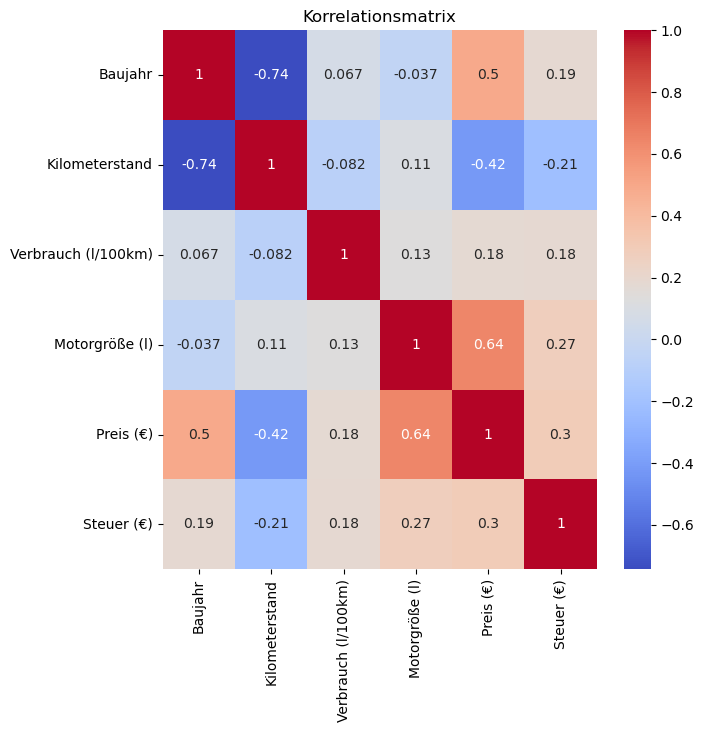

Preis (€)              1.000000
Motorgröße (l)         0.639612
Baujahr                0.495215
Steuer (€)             0.296140
Verbrauch (l/100km)    0.177847
Kilometerstand        -0.418395
Name: Preis (€), dtype: float64

In [33]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

# Zeigen der Korrelationen mit dem Preis
correlation_with_price = correlation_matrix['Preis (€)'].sort_values(ascending=False)
correlation_with_price


In [34]:
from scipy.stats import pearsonr

numerical_features = ['Baujahr', 'Kilometerstand', 'Verbrauch (l/100km)', 'Motorgröße (l)', 'Preis (€)', 'Steuer (€)']

# Berechnen der Korrelationskoeffizienten und p-Werte
correlation_p_values = {feature: pearsonr(df['Preis (€)'], df[feature]) for feature in numerical_features if feature != 'Preis (€)'}

# Umwandeln in ein DataFrame für eine bessere Darstellung
correlation_p_values_df = pd.DataFrame.from_dict(correlation_p_values, orient='index', columns=['Korrelation', 'p-Wert'])
correlation_p_values_df


,Korrelation,p-Wert
Baujahr,0.495215,0.0
Kilometerstand,-0.418395,0.0
Verbrauch (l/100km),0.177847,0.0
Motorgröße (l),0.639612,0.0
Steuer (€),0.296140,0.0


Alle p-Werte sind 0, was bedeutet, dass die Korrelationen statistisch signifikant sind.

#### <a id="Daten-bereinigen"></a>**2.4. Multivariate Analyse**

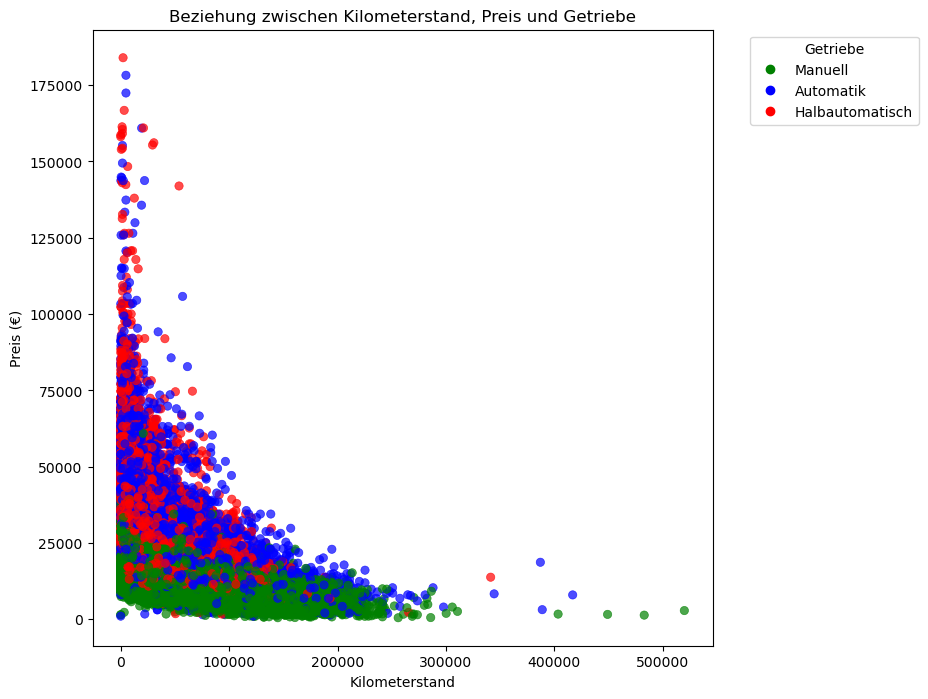

In [35]:
plt.figure(figsize=(8, 8))
scatter = sns.scatterplot(data=df, x='Kilometerstand', y='Preis (€)', hue='Getriebe', 
                          palette={'Manuell':'green', 'Automatik':'blue', 'Halbautomatisch':'red'}, alpha=0.7, edgecolor=None)
plt.title('Beziehung zwischen Kilometerstand, Preis und Getriebe')
plt.xlabel('Kilometerstand')
plt.ylabel('Preis (€)')

legend_labels = ['Manuell', 'Automatik', 'Halbautomatisch']
legend_colors = ['green', 'blue', 'red']
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend_colors]
plt.legend(markers, legend_labels, title='Getriebe', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Jeder Punkt auf dem Diagramm repräsentiert ein Auto. Die horizontale Position des Punktes zeigt den Kilometerstand des Autos, während die vertikale Position den Preis des Autos zeigt. Die Farbe des Punktes zeigt das Getriebe des Autos.

Autos mit höherem Kilometerstand scheinen tendenziell einen niedrigeren Preis zu haben. Darüber hinaus scheinen Autos mit manuellem Getriebe über das gesamte Spektrum des Kilometerstands und des Preises verteilt zu sein, während Autos mit Automatikgetriebe und halbautomatischem Getriebe  eher in den Bereichen mit niedrigerem Kilometerstand und höherem Preis zu liegen.

### <a id="Datenaufbereitung"></a>**3. Feauture Engineering**

Feature Engineering ist ein entscheidender Schritt im Prozess des maschinellen Lernens. Es ermöglicht uns, die Daten in einer Weise zu transformieren, die die Effektivität und Effizienz von Modellen verbessert. Durch sorgfältige Modifikation und Auswahl von Merkmalen in unseren Daten können wir Modelle erstellen, die genaue Vorhersagen liefern und leicht zu interpretieren sind. In diesem Abschnitt werden wir das Feature Engineering auf unseren Datensatz anwenden und zeigen, wie es die Genauigkeit unserer Modellvorhersagen verbessern kann.


Wir führen noch einmal die obigen Korrelationsergebnisse vor Augen und sehen, dass die Motorgröße, Baujahr und Kilometerstand (negativer Zusammenhang) die größten Einflussfaktoren für unser Modell sind.

In [36]:
correlation = df.corr(numeric_only=True)['Preis (€)'].sort_values(ascending=False)
correlation

Preis (€)              1.000000
Motorgröße (l)         0.639612
Baujahr                0.495215
Steuer (€)             0.296140
Verbrauch (l/100km)    0.177847
Kilometerstand        -0.418395
Name: Preis (€), dtype: float64

**"Da die 'Steuer'-Information in unserem Datensatz nicht intuitiv zu bestimmen ist und daher bei der Anwendung des Preisvorhersagemodells auf neue Daten für den Benutzer schwer einzuschätzen wäre, wurde diese Merkmal für unser Vorhersagemodell enrfernt.**


Alle restlichen Spalten wurden hinzugezogen.

In [37]:
df.drop(columns='Steuer (€)', inplace=True)

In [38]:
import pickle
from sklearn.preprocessing import LabelEncoder

In [39]:
label_columns = ['Marke', 'Modell', 'Getriebe', 'Kraftstoffart']
encoders = {}
for column in label_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

X = df.drop(columns=['Preis (€)'])
y = df['Preis (€)']

In [40]:
with open('../model/label_encoders.pkl', 'wb') as handle:
    pickle.dump(encoders, handle, protocol=pickle.HIGHEST_PROTOCOL)

### <a id="Datenaufbereitung"></a>**4. Modell Auswahl und Training**

Nachfolgend beziehen sich die Abschnitte auf [6], [7] und [8].

**Nun kommen wir zum Hauptteil der Arbeit - unserer Preisvorhersage!**

Die Preisvorhersage von Gebrauchtwagen unterliegt einem sogenannten **Regressionsproblem** und ist dem **Supervised Learning** (auch *Überwachten Lernen*) zuzuordnen. Die Regression ist ein Modell, das eine kontinuierliche Zielvariable (auch abhängige Variable oder Zielvariable genannt) auf der Grundlage einer oder mehrerer unabhängiger Variablen (auch Merkmale oder Prädiktoren genannt) vorhersagt.

Die Funktion  $f$, die wir im Rahmen unseres Regressionsproblems lernen möchten, ist eine Abbildung von einer Feature-Matrix $X$, die aus mehreren Merkmalen besteht, auf einen Zielvektor $y$, der den vorhergesagten Preis darstellt. In einem mathematischen Sinne ist das Ziel der maschinellen Lernmethoden, die zugrunde liegende "wahre" Funktion $f$ zu approximieren, die die Beziehung zwischen den Eingangsmerkmalen $X$ und der Ausgabe $y$ beschreibt.

\begin{align*}
f: X \rightarrow y
\end{align*}

In der Praxis wissen wir natürlich nicht, was die "wahre" Funktion $f$ ist - genau das ist es, was wir herausfinden wollen! Deshalb benutzen wir Algorithmen für maschinelles Lernen, um ein **Modell $\hat{f}$ zu erzeugen, das unsere beste Schätzung für $f$ ist**. 

Unser Modell $\hat{f}$ nimmt die Merkmale eines Autos (wie Marke, Modell, Baujahr, Kilometerstand usw.) als Eingabe und gibt als Ausgabe den geschätzten Preis des Autos aus.


Um ein solches Modell zu erstellen, gibt es viele verschiedene Methoden und Algorithmen, die wir verwenden könnten. 

In dieser Arbeit haben wir uns entschieden, den **XGBoost-Algorithmus** (kurz: extreme Gradient Boosting) zu verwenden. Dieser ist bekannt für seine Leistungsfähigkeit und Effizienz und stach oft heraus auf verschiedenen ML-Wettbewerben.

XGBoost baut auf der Idee des Gradienten-Boosting auf, wo viele schwache Vorhersagemodelle (in der Regel Entscheidungsbäume) kombiniert werden, um ein starkes Vorhersagemodell zu erstellen. Jedes zusätzliche Modell im Ensemble wird so konfiguriert, dass es die Fehler des bisherigen Modells korrigiert, was zu einem Modell führt, das im Laufe der Zeit immer genauer wird.

**Feature-Matrix**

In [41]:
X

,Marke,Modell,Baujahr,Getriebe,Kilometerstand,Kraftstoffart,Verbrauch (l/100km),Motorgröße (l)
0,0,12,2017,2,25322,0,4.25,1.4
1,0,17,2016,0,58262,1,3.66,2.0
2,0,12,2016,2,48193,0,4.25,1.4
3,0,15,2017,0,41765,1,3.50,2.0
4,0,14,2019,2,3215,0,4.74,1.0
...,...,...,...,...,...,...,...,...
99182,8,61,2012,2,119091,1,3.99,2.0
99183,8,66,2008,2,141786,0,5.08,1.2
99184,8,66,2009,2,112653,0,5.60,1.4
99185,8,66,2006,2,133098,0,5.08,1.2


**Zielvariable**

In [42]:
y

0        14375.00
1        18975.00
2        12650.00
3        19320.00
4        19895.00
           ...   
99182     6888.50
99183     2068.85
99184     1828.50
99185     1437.50
99186     2639.25
Name: Preis (€), Length: 97449, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% Training, 20% Test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77959, 8), (19490, 8), (77959,), (19490,))

In [45]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

### <a id="Daten-extrahieren"></a>**5. Modell Bewertung**

**Bestimmheitsmaß:**

Das Bestimmtheitsmaß $R^2$ ist ein statistisches Maß, das die Güte der Anpassung eines Regressionsmodells darstellt. 

\begin{align*}
R^2 &=  \frac{\sum_{i=1}^n (\hat{y}_i - \bar{y})^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\end{align*}

Der Trainingsscore gibt an, wie gut unser Modell die Daten "erlernt" hat, auf denen es trainiert wurde. Und der Testscore gibt an, wie gut unser Modell in der Lage ist, auf neuen, bisher ungesehenen Daten Vorhersagen zu treffen. Das Ziel ist es nun, ein Modell zu finden, das sowohl einen hohen Trainingsscore als auch einen hohen Testscore hat. Dies würde darauf hindeuten, dass unser Modell die Muster in den Daten gut erfasst, ohne zu Overfitting oder Underfitting zu neigen.
 

In [46]:
train_score = xgb_model.score(X_train, y_train)
test_score = xgb_model.score(X_test, y_test)

train_score, test_score

(0.9703886008979163, 0.9655126347762227)

In [47]:
print(f"Trainingsgenauigkeit (R²-Wert): {train_score} ")
print('\n')
print(f"Trainingsgenauigkeit (R²-Wert):  {test_score}")
print('\n')
print('Diese Werte zeigen, dass das Modell gut auf die Trainingsdaten passt und auch eine gute Leistung auf den Testdaten zeigt.')

Trainingsgenauigkeit (R²-Wert): 0.9703886008979163 


Trainingsgenauigkeit (R²-Wert):  0.9655126347762227


Diese Werte zeigen, dass das Modell gut auf die Trainingsdaten passt und auch eine gute Leistung auf den Testdaten zeigt.


Dies ist ein ziemlich gutes Ergebnis, da es nahelegt, dass unser Modell nicht überangepasst ist und eine insgesamt eine gute Leistung sowohl auf den Trainingsdaten als auch auf den Testdaten zeigt.

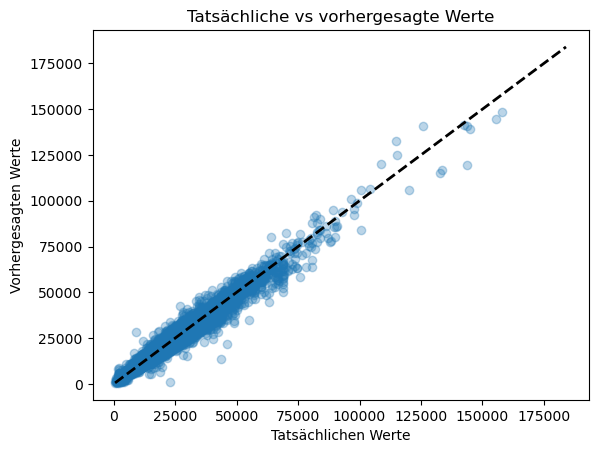

In [48]:
y_pred = xgb_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Tatsächlichen Werte')
plt.ylabel('Vorhergesagten Werte')
plt.title("Tatsächliche vs vorhergesagte Werte")
plt.show()

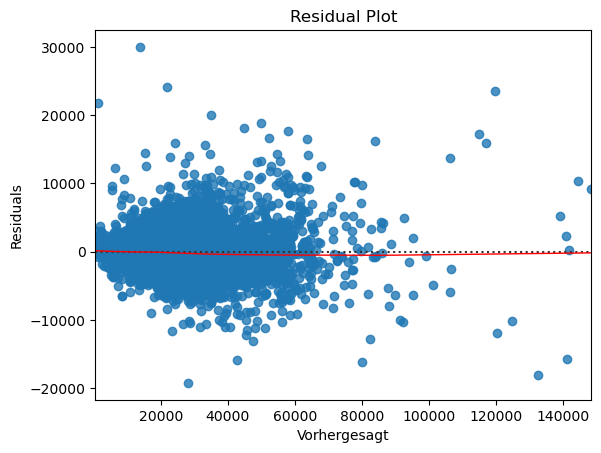

In [49]:
# Residual Plot
residuals = y_test - y_pred
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel('Vorhergesagt')
plt.ylabel('Residuals')
plt.title("Residual Plot")
plt.show()


In [50]:
# Speicherpfad für das XGBoost-Modell im JSON-Format
xgb_model_json_path = '../model/xgb_model.json'

# Speichern des XGBoost-Modells im JSON-Format
xgb_model.save_model(xgb_model_json_path)

xgb_model_json_path

'../model/xgb_model.json'

### <a id="Daten-extrahieren"></a>**6. Streamlit**

Siehe unter **'.\streamlit\ml_model.py'**. Inspiration und Hilfe aus [4] und [9].

### **Literaturverzeichnis**

[1] https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes (01.08.2023)

[2] Müller, A. C., & Guido, S. (2021). Introduction to Machine Learning with Python: A Guide for Data Scientists (2nd ed.). O'Reilly Media

[3] McKinney, W. (2017). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media.

[4] OpenAI. (2023). Persönliche Kommunikation mit OpenAI's GPT-3.5 Modell. (01.08.2023)
 
[5] Peter Bruce, Andrew Bruce, Peter Gedeck. Praktische Statistik für Data Scientists: 50+ essenzielle Konzepte mit R und Python, 2021.

[6] Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani (2013). An Introduction to Statistical Learning: with Applications in R

[7] Aurélien Géron (2020). Praxiseinstieg Machine Learning mit Scikit-Learn und TensorFlow: Konzepte, Tools und Techniken für intelligente Systeme. O'Reilly.

[8] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html  (03.08.2023)

[9] https://towardsdatascience.com/deploying-ml-models-using-streamlit-5d6212453bdd (04.08.2023)